In [2]:
! ls Datasets/new_test

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
import itertools

In [2]:
from tensorflow.keras.preprocessing import image

In [35]:
#DATADIR = r'D:\EDU Files\project\fire\MNet_Vgg Fire tuning\BowFire_Data'
# DATADIR = r'D:/Study/doancn/Our_Complete_Dataset_Video_and_extra_NoFire_Frames/'
# CATEGORIES = ['fire', 'NoFire']

fire
NoFire
Other NoFire images
True


In [57]:
# for category in CATEGORIES:
      
#   path = os.path.join(DATADIR,category)
#   count = 0
#   for vid in os.listdir(path):
#     vidpath = os.path.join(path,vid)
#     vidcap = cv2.VideoCapture(vidpath)
#     success,image = vidcap.read()
#     # print('D:/Study/doancn/testdataset'+"/"+str(category)+"/"+"frame%d.jpg" % count)
#     while success:
#       cv2.imwrite('D:/Study/doancn/testdataset'+'/'+str(category)+'/'+'frame%d.jpg' % count, image)     # save frame as JPEG file      
#       success,image = vidcap.read()
#       count += 1
#       print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [3]:
DATADIR = r'D:/Study/doancn/testdataset/'
CATEGORIES = ['fire', 'NoFire']

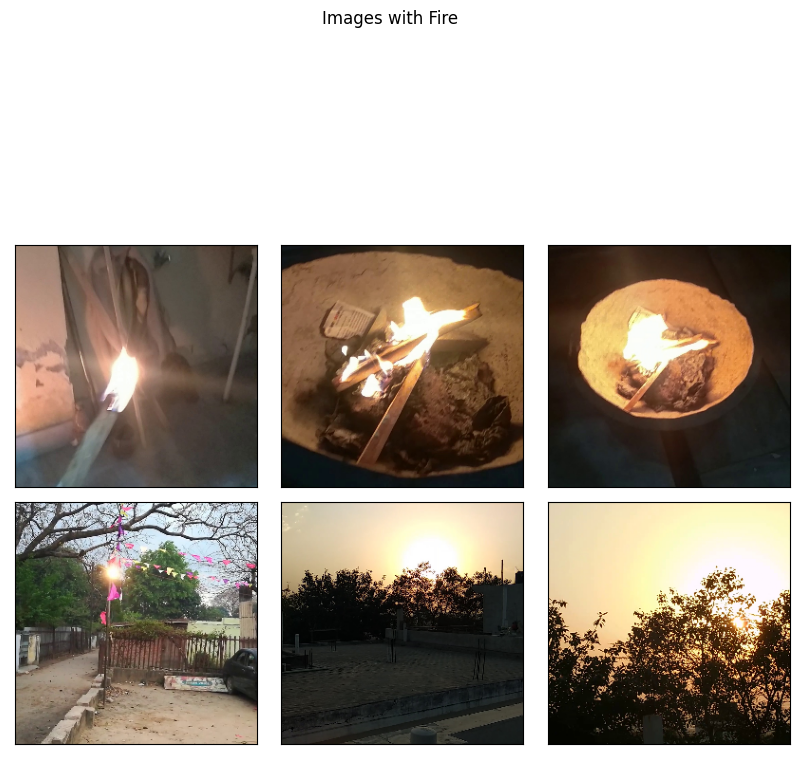

In [16]:
import random
from matplotlib import pyplot as plt
pics = 6 #set the number of pics
fig,ax = plt.subplots(2,int(pics//2),figsize=(10,10))
plt.suptitle('Images with Fire')
plt.subplots_adjust(wspace=0.1, hspace=-0.5)
ax = ax.ravel()
for i in range((pics//2)):
    path = os.path.join(DATADIR,'fire')
    i=0
    for j in range(3):
        img = random.choice(os.listdir(path))
        img = image.load_img(os.path.join(path,img))
        img = image.smart_resize(img,(256,256))
        img = image.img_to_array(img)/255
        ax[i].imshow(img)
        ax[i].axes.xaxis.set_visible(False)
        ax[i].axes.yaxis.set_visible(False)
        i=i+1
        if i==3:
            break
for i in range((pics//2)):
    path = os.path.join(DATADIR,'NoFire')
    i=3
    for j in range(3):
        img = random.choice(os.listdir(path))
        img = image.load_img(os.path.join(path,img))
        img = image.smart_resize(img,(256,256))
        img = image.img_to_array(img)/255
        ax[i].imshow(img)
        ax[i].axes.xaxis.set_visible(False)
        ax[i].axes.yaxis.set_visible(False)
        i=i+1
        if i==6:
            break

In [35]:
IMG_SIZE = 64
def create_training_data():
    training_data = []
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=C 1=O
        
        for img in tqdm(os.listdir(path)):  # iterate over each image
                try:
                    img_array = cv2.imread(os.path.join(path,img))  # convert to array
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                    training_data.append([new_array, class_num])  # add this to our training_data
                except Exception as e:  # in the interest in keeping the output clean...
                    pass
              
    return training_data

In [36]:
training_data = create_training_data()

100%|██████████| 6907/6907 [06:55<00:00, 16.60it/s] 


In [37]:
import random
test_image_num=26001
print(len(training_data))
random.shuffle(training_data)
test_labels=np.zeros((test_image_num,1))

c=0
for sample in training_data:
    test_labels[c]=(sample[1])
    c+=1
print(c)
actual_labels=(test_labels.reshape(test_image_num,))
print(actual_labels.shape)
actual_labels.astype(int)

26001
26001
(26001,)


array([0, 0, 0, ..., 0, 0, 1])

In [39]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X = X/255.0
X.shape[1:]
X.shape[0]

26001

In [40]:
from keras.models import load_model
model=load_model('D:\Study\doancn\FireNet\Codes\TrainedModels\Fire.h5')

In [42]:
predicted_labels=model.predict(X)
# predicted_labels=(predicted_labels.reshape(test_image_num,))
# predicted_labels.astype(int)
classes = np.argmax(predicted_labels, axis = 1)


813/813 [==============================] - 16s 19ms/step


In [43]:
print(classes)

[0 0 0 ... 0 0 1]


In [44]:
predicted_labels=classes

Confusion matrix, without normalization
[[16753  2341]
 [  722  6185]]


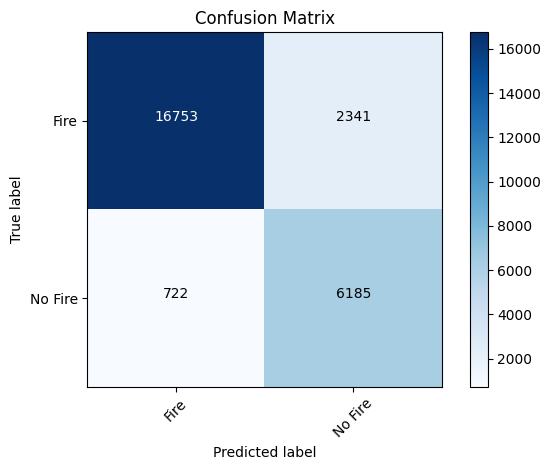

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(actual_labels, predicted_labels)
#test_batches.class_indices
cm_plot_labels=['Fire','No Fire']
plot_confusion_matrix(cm, cm_plot_labels,title='Confusion Matrix')

In [48]:
tp=cm[0][0]
fn=cm[0][1]
fp=cm[1][0]
tn=cm[1][1]
print("tp"+' '+str(tp))
print("fn"+' '+str(fn))
print("fp"+' '+str(fp))
print("tn"+' '+str(tn))

tp 16753
fn 2341
fp 722
tn 6185


In [50]:
Recall=tp/(tp+fn)
Precision=tp/(tp+fp)
f_measure= 2*((Precision*Recall)/(Precision+Recall))
Accuracy=(tp+tn)/(tp+tn+fp+fn)
print(Precision, Recall, f_measure,Accuracy)



0.9586838340486409 0.877396040641039 0.9162405315978014 0.8821968385831315


In [ ]:
model.evaluate(X, Y)